[[0.997528 0.995737 0.989589 0.892689 0.818182 0.805172 0.998107 0.977726
  0.842444 0.945537 0.923077]
 [0.983883 0.996155 0.998777 0.974952 0.854296 0.856895 1.       0.988193
  0.927548 0.985727 1.      ]
 [0.997512 0.996602 0.995739 0.906911 0.83571  0.826241 0.997729 0.983832
  0.881356 0.946412 0.972973]
 [0.989889 0.994969 0.99833  0.975807 0.898348 0.888341 0.999277 0.9852
  0.937388 0.988976 0.999499]]
['WWW' 'MAIL' 'FTP-CONTROL' 'FTP-PASV' 'ATTACK' 'P2P' 'DATABASE'
 'FTP-DATA' 'MULTIMEDIA' 'SERVICES' 'INTERACTIVE']


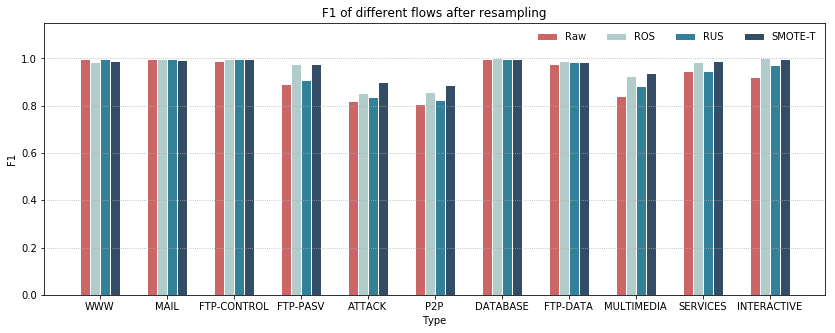

[[0.998486 0.994749 0.985808 0.938042 0.702602 0.743631 0.996222 0.971823
  0.757225 0.992063 0.909091]
 [0.996972 0.993222 0.997889 0.979556 0.747889 0.767111 1.       0.981111
  1.       0.997556 1.      ]
 [0.996976 0.99587  0.994761 0.956845 0.751394 0.890162 0.995468 0.986888
  0.8125   0.993327 0.981818]
 [0.997341 0.991975 0.997996 0.982278 0.826503 0.82547  0.998666 0.981308
  0.992645 0.99711  1.      ]]
['WWW' 'MAIL' 'FTP-CONTROL' 'FTP-PASV' 'ATTACK' 'P2P' 'DATABASE'
 'FTP-DATA' 'MULTIMEDIA' 'SERVICES' 'INTERACTIVE']


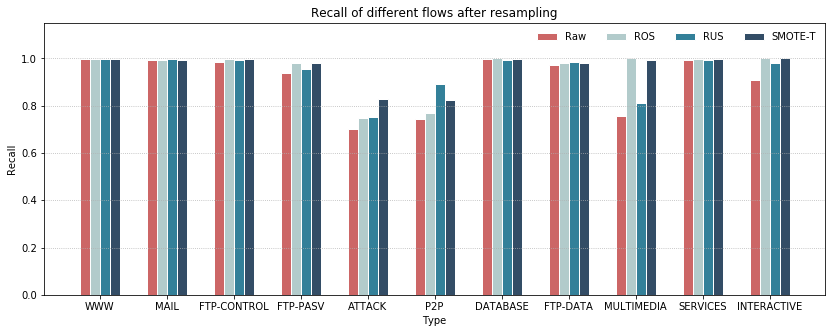

[[0.996573 0.996726 0.993399 0.851519 0.979275 0.87782  1.       0.983702
  0.949275 0.903179 0.9375  ]
 [0.971132 0.999106 0.999666 0.970391 0.996005 0.970481 1.       0.995378
  0.864886 0.974175 1.      ]
 [0.998047 0.997336 0.996719 0.86193  0.941341 0.770885 1.       0.980796
  0.962963 0.903729 0.964286]
 [0.982547 0.997982 0.998663 0.96942  0.983873 0.961579 0.999889 0.989122
  0.887959 0.980973 0.998999]]
['WWW' 'MAIL' 'FTP-CONTROL' 'FTP-PASV' 'ATTACK' 'P2P' 'DATABASE'
 'FTP-DATA' 'MULTIMEDIA' 'SERVICES' 'INTERACTIVE']


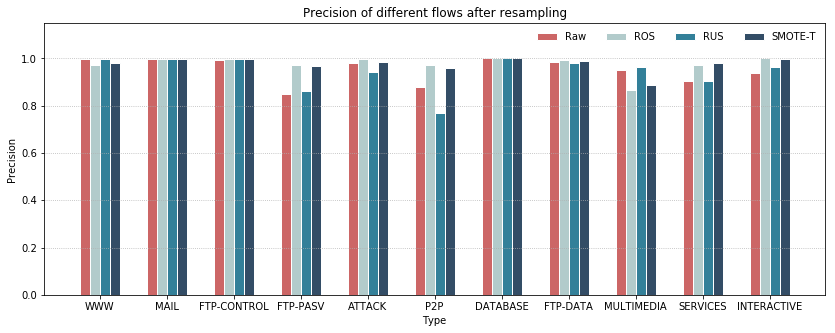

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# metric = 'Precision'
def plot(metric):
    df = pd.read_csv('lgb_resample_'+metric.lower()+'_comp.csv')
    
    plt.rcParams['savefig.dpi'] = 300
    
    values = df[df.columns[1:]].values.T
    clf_names = df.columns[1:]
    classes =df['Type'].values.T
    print(values)
    print(classes)


    fig = plt.figure(figsize=(14,5))

    width = .15
    index = np.arange(len(classes))
    classes

    ax = plt.subplot(1,1,1)
    plt.grid(axis = 'y', linestyle=':', drawstyle='steps-post')
    rects1 = ax.bar(index,values[0],align='center',width=width,
       color=(.8,.4,.4,1),edgecolor='w',linewidth=1,log=False,label='Raw')
    rects2 = ax.bar(index+width,values[1], align='center',width=width,
       color=(.4,.6,.6,.5),edgecolor='w',linewidth=1,log=False,label='ROS')
    rects3 = ax.bar(index+2*width,values[2], align='center',width=width,
       color=(.2,.5,.6,1),edgecolor='w',linewidth=1,log=False,label='RUS')
    rects4 = ax.bar(index+3*width,values[3], align='center',width=width,
       color=(.2,.3,.4,1),edgecolor='w',linewidth=1,log=False,label='SMOTE-T')
    ax.set_ylabel(metric)
    ax.set_xlabel('Type')
    ax.set_ylim(0,1.15)
    ax.legend(loc='best', ncol = 4, frameon = False)
    plt.xticks(index+width*1.5,classes)
    
    ax.set_title(metric + ' of different flows after resampling')
    def set_values(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom',fontsize=8)
            rect.set_edgecolor((.9,.9,1))
    # add values on the top of the bar


    plt.savefig('lgb_resample_'+metric.lower()+'_comp.png')
    plt.show()
    # from matplotlib.ticker import MultipleLocator, FormatStrFormatter, NullLocator
    # yformatter = FormatStrFormatter('%1.2f')
    # ylocator = NullLocator()
    # ax.yaxis.set_major_formatter(ymajorLocator)
    # ax.yaxis.set_major_locator(ylocator)

    # set_values(rects1)
    # set_values(rects2)
plot('F1')
plot('Recall')
plot('Precision')